reference: https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794

## Title: Sentiment Analysis in Social Media Text using Neural Network <a class="anchor" id="intro"></a>

Description:

In this project, two most frequently used machine learning algorithms, which are Multinomial Naïve Bayes and Logistic Regression machine learning algorithm, are used to compare with the proposed method. 

Figure below shows the flowchart on how to train and test using machine learning method. The process started by define and import Python libraries that need to be used in the program. Then, read dataset and check for any possible empty comments in dataset.  It is always a good practice to check and drop any empty value in important columns of dataset so that we will not encounter any errors in code regarding the empty rows later. Polarity of each comments are being convert from string to integer, by assigning 0 to negative, 1 for neutral and 2 for positive polarity. 

### Table of Content

* [Introduction](#intro)
	* [Set-up environment](#set_up)
	* [Load Dataset](#load_data)
	* [Drop Duplicate Rows](#drop_row)
	* [Categorical Target Conversion](#convert_target)
* [Word Embedding - BOW](#word_emb)
	* [Naive Bayes + BOW](#bow_nb)
	* [Logistic Regression + BOW](#bow_lr)
* [Word Embedding - TF-IDF](#tfidf_emb)
	* [Naive Bayes + TF-IDF](#tfidf_nb)
	* [Logistic Regression + TF-IDF](#tfidf_lr)

#### Set-up Environment <a class="anchor" id="setup"></a>

In [1]:
## for data
import json
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for processing
import re
import nltk
## for bag-of-words
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
## for explainer
from lime.lime_text import LimeTextExplainer
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
## for bert language model
import transformers

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### Load Dataset <a class="anchor" id="load_data"></a>

In [2]:
texts = pd.read_csv('3 classes/facebook_health_cases (all).csv')
df = pd.DataFrame(texts)
df

date                                               text sentiment  \
0     20210221  #dsnr salam dato.. lebih kurang 15km dari ruma...  negative   
1     20210204  #noorhishamabdullah you’re not dr.fauci materi...  negative   
2     20210130  #share dan #like page #the_information_news un...   neutral   
3     20210202  1 dunia sedang & terus diperbodohkan dgn agend...  negative   
4     20210206  1 hari sy harap angka nie turun single digit m...  positive   
...        ...                                                ...       ...   
7902  20210121                                               wish  positive   
7903  20210123  ya allah.. sy rasa satu pkra kita terlepas pan...  positive   
7904  20210124  ya allah mari kita brdoa bnyk2 smoga allah amp...  positive   
7905  20210125  yaallah ya tuhan ku sembuhkan la semua pesakit...  positive   
7906  20210121                     😰more deaths. god have mercy 😰  negative   

                                              processed  \
0     salam dato lebih kurang  km dari rumah ke kila...   
1     you re not dr fauci material you re just pn gr...   
2     dan page untuk mendapatkan khabar berita yang ...   
3     satu dunia sedang and terus diperbodohkan dgn ...   
4     satu hari sy harap angka nie turun single digi...   
...                                                 ...   
7902                                               wish   
7903  ya allah sy rasa satu pkra kita terlepas panda...   
7904  ya allah mari kita brdoa bnyk  smoga allah amp...   
7905  yaallah ya tuhan ku sembuhkan la semua pesakit...   
7906                         more deaths god have mercy   

                                             normalized  \
0     salam dato lebih kurang km dari rumah ke kilan...   
1     you re not dr fauci material you re just pun g...   
2     dan page untuk mendapatkan khabar berita yang ...   
3     satu dunia sedang and terus diperbodohkan deng...   
4     satu hari sy harap angka ini turun single digi...   
...                                                 ...   
7902                                               wish   
7903  ya allah sy rasa satu pkra kita terlepas panda...   
7904  ya allah mari kita brdoa banyak semoga allah a...   
7905  yaal lah ya tuhan ku sembuhkan la semua pesaki...   
7906                         more deaths god have mercy   

                                                  check  \
0     salam dato lebih kurang kkm dari rumah ke kila...   
1     you re not dr fauci material you re just pun g...   
2     dan page untuk mendapatkan khabar berita yang ...   
3     satu dunia sedang and terus diperbodohkan deng...   
4     satu hari sy harap angka ini turun single digi...   
...                                                 ...   
7902                                               wish   
7903  ya allah sy rasa satu pkra kita terlepas panda...   
7904  ya allah mari kita berdoa banyak semoga allah ...   
7905  yaal lah ya tuhan aku sembuhkan la semua pesak...   
7906                         more deaths god have mercy   

                                             check_stop  
0     kurang kkm rumah ke kilang pkp pkb pkpp tidak ...  
1                       not fauci material grabmart boy  
2     page khabar berita saudara patani selatan thai...  
3     dunia diperbodohkan agenda yahudi ekonomi duni...  
4     harap angka turun single digit capai zero case...  
...                                                 ...  
7902                                               wish  
7903  pkra terlepas pandang lupa solat hajat bacaan ...  
7904  mari berdoa banyak semoga ampunkan dosa harap ...  
7905  tuhan sembuhkan pesakit covid tuhan lindungi k...  
7906                                   deaths god mercy  

[7907 rows x 7 columns]

#### Drop Duplicate Row(s) <a class="anchor" id="drop_row"></a>

In [3]:
# remove possible empty text cell
print("before cleaned: ", df.shape)
df['check_stop'].replace('', np.nan, inplace=True)
df = df.dropna()
df = df.reset_index(drop=True)
print("After: ", df.shape)

before cleaned:  (7907, 7)
After:  (7905, 7)


#### Categorical Target Conversion   <a class="anchor" id="convert_target"></a>

*cat.codes* is a function from library Panda that convert categorical value to numeric value. In this project, the target values that has been converted are:
- negative -> 0
- neutral -> 1
- positive -> 2

In [4]:
# Map the sentiment into 0 , 1, 2
df['sentiment'] = df['sentiment'].map({'positive':2, 'negative':0, 'neutral':1})

Check first five rows after conversion

In [5]:
df.head()

date                                               text  sentiment  \
0  20210221  #dsnr salam dato.. lebih kurang 15km dari ruma...          0   
1  20210204  #noorhishamabdullah you’re not dr.fauci materi...          0   
2  20210130  #share dan #like page #the_information_news un...          1   
3  20210202  1 dunia sedang & terus diperbodohkan dgn agend...          0   
4  20210206  1 hari sy harap angka nie turun single digit m...          2   

                                           processed  \
0  salam dato lebih kurang  km dari rumah ke kila...   
1  you re not dr fauci material you re just pn gr...   
2  dan page untuk mendapatkan khabar berita yang ...   
3  satu dunia sedang and terus diperbodohkan dgn ...   
4  satu hari sy harap angka nie turun single digi...   

                                          normalized  \
0  salam dato lebih kurang km dari rumah ke kilan...   
1  you re not dr fauci material you re just pun g...   
2  dan page untuk mendapatkan khabar berita yang ...   
3  satu dunia sedang and terus diperbodohkan deng...   
4  satu hari sy harap angka ini turun single digi...   

                                               check  \
0  salam dato lebih kurang kkm dari rumah ke kila...   
1  you re not dr fauci material you re just pun g...   
2  dan page untuk mendapatkan khabar berita yang ...   
3  satu dunia sedang and terus diperbodohkan deng...   
4  satu hari sy harap angka ini turun single digi...   

                                          check_stop  
0  kurang kkm rumah ke kilang pkp pkb pkpp tidak ...  
1                    not fauci material grabmart boy  
2  page khabar berita saudara patani selatan thai...  
3  dunia diperbodohkan agenda yahudi ekonomi duni...  
4  harap angka turun single digit capai zero case...

In order to understand the composition of the dataset, I am going to look into the univariate distribution of the target by showing labels frequency with a bar plot.

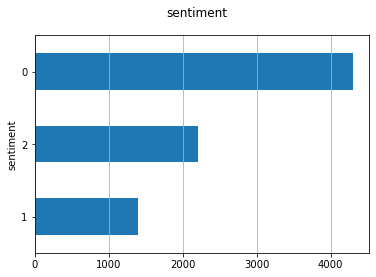

In [6]:
fig, ax = plt.subplots()
fig.suptitle("sentiment", fontsize=12)
df["sentiment"].reset_index().groupby("sentiment").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

### BOW and TFIDF

#### Lime Visualizer

source: https://marcotcr.github.io/lime/tutorials/Lime%20-%20multiclass.html

In [12]:
# vectorizer + model evaluation + lime (all in one :D)
def ml_plot(corpus, model, split_percent, limee=False): 
    X = corpus.check_stop
    y = corpus.sentiment
    X_train_ori, X_test_ori, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                        test_size=split_percent, 
                                                                        random_state=42)
    
    # vectorizer
    vectorizer = feature_extraction.text.CountVectorizer(max_features=10000) #bigram
    X_train = vectorizer.fit_transform(X_train_ori)
    X_test = vectorizer.transform(X_test_ori)
    # dic_vocabulary = vectorizer.vocabulary_
    
    classes = np.unique(y_test)
    
    
    ## pipeline
    clf = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", model)])

    #clf = model
    clf['classifier'].fit(X_train, y_train)
    prediction = clf.predict(X_test_ori)
    predicted_prob = clf.predict_proba(X_test_ori)


    #print ("train score: ", clf.score(X_train, y_train))
    #print ("test score: ", clf.score(X_test_ori, y_test_ori))
    #print ("NB Accuracy: ", accuracy_score(y_test, prediction))
    #print ("K fold cross validation accuracy: ", cross_val_score(clf,X_train_matrix,y,cv=kf).mean()*100)


    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test, prediction)
    auc = metrics.roc_auc_score(y_test, predicted_prob, 
                                multi_class="ovr")
    print ("train score: ", clf['classifier'].score(X_train, y_train))
    print ("test score: ", clf['classifier'].score(X_test, y_test))
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print("Detail:")
    print(metrics.classification_report(y_test, prediction))


    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, prediction)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    y_test_array = pd.get_dummies(y_test, drop_first=False).values


    ## Plot roc
    fig, ax = plt.subplots(nrows=1, ncols=2)
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                               predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
                  label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.show()
    
    
    text = 'tidak logik cepat turun kes'
    print(clf.predict([text]))
    classes = ['negative', 'neutral', 'positive']
    
    if limee:
        print(r'------------------------LIME---------------------------')
        explainer = LimeTextExplainer(class_names=classes)
        idx=4
        exp = explainer.explain_instance(text, clf.predict_proba, num_features=6, top_labels=2)
        print("available labels: ", exp.available_labels())
        
        print(exp.show_in_notebook(text=False))
        print("note = 0 negative 1 neutral 2 positive")


#### Naive Bayes + BOW <a class="anchor" id="bow_nb"></a>

train score:  0.82571649883811
test score:  0.7232704402515723
Accuracy: 0.72
Auc: 0.84
Detail:
              precision    recall  f1-score   support

           0       0.73      0.87      0.79        89
           1       0.62      0.17      0.26        30
           2       0.72      0.82      0.77        40

    accuracy                           0.72       159
   macro avg       0.69      0.62      0.61       159
weighted avg       0.71      0.72      0.69       159



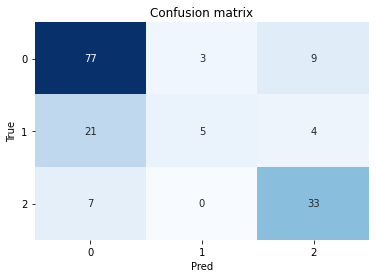

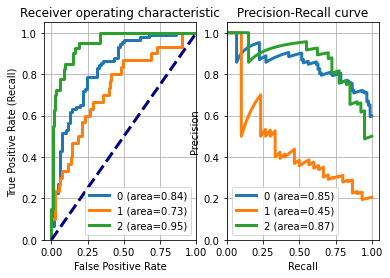

[0]
------------------------LIME---------------------------
available labels:  [0, 2]


None
note = 0 negative 1 neutral 2 positive


In [13]:
m = ml_plot(df, MultinomialNB(), .02, limee=True)

#### Logistic Regression + BOW <a class="anchor" id="bow_lr"></a>

train score:  0.9339013684482314
test score:  0.7484276729559748
Accuracy: 0.75
Auc: 0.84
Detail:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        89
           1       0.46      0.20      0.28        30
           2       0.77      0.85      0.81        40

    accuracy                           0.75       159
   macro avg       0.67      0.65      0.64       159
weighted avg       0.72      0.75      0.72       159



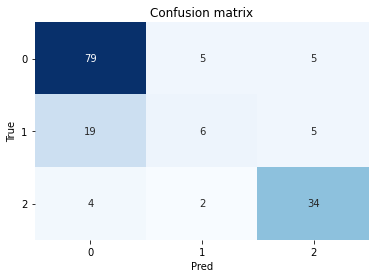

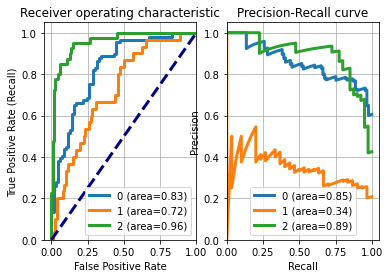

[0]
------------------------LIME---------------------------
available labels:  [0, 2]


None
note = 0 negative 1 neutral 2 positive


In [14]:
ml_plot(df, LogisticRegression(max_iter=1000), .02, limee=True)

In [15]:
# vectorizer + model evaluation + lime (all in one :D)
def ml_plot_tfidf(corpus, model, split_percent, limee=False): 
    X = corpus.check_stop
    y = corpus.sentiment
    
    X_train_ori, X_test_ori, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                        test_size=split_percent, 
                                                                        random_state=42)
    
    # bow
    #vectorizer = feature_extraction.text.CountVectorizer(max_features=10000, ngram_range=(1,2))
    #X_train = vectorizer.fit_transform(X_train_ori)
    #X_test = vectorizer.transform(X_test_ori)
    # dic_vocabulary = vectorizer.vocabulary_
    
    ## Tf-Idf (advanced variant of BoW)
    vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))
    X_train = vectorizer.fit_transform(X_train_ori)
    X_test = vectorizer.transform(X_test_ori)
    
    
    classes = np.unique(y_test)
    
    
    ## pipeline
    clf = pipeline.Pipeline([("vectorizer", vectorizer),  
                           ("classifier", model)])

    #clf = model
    clf['classifier'].fit(X_train, y_train)
    prediction = clf.predict(X_test_ori)
    predicted_prob = clf.predict_proba(X_test_ori)


    #print ("train score: ", clf.score(X_train, y_train))
    #print ("test score: ", clf.score(X_test_ori, y_test_ori))
    #print ("NB Accuracy: ", accuracy_score(y_test, prediction))
    #print ("K fold cross validation accuracy: ", cross_val_score(clf,X_train_matrix,y,cv=kf).mean()*100)


    ## Accuracy, Precision, Recall
    accuracy = metrics.accuracy_score(y_test, prediction)
    auc = metrics.roc_auc_score(y_test, predicted_prob, 
                                multi_class="ovr")
    print ("train score: ", clf['classifier'].score(X_train, y_train))
    print ("test score: ", clf['classifier'].score(X_test, y_test))
    print("Accuracy:",  round(accuracy,2))
    print("Auc:", round(auc,2))
    print("Detail:")
    print(metrics.classification_report(y_test, prediction))


    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, prediction)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
                cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
           yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)

    y_test_array = pd.get_dummies(y_test, drop_first=False).values


    ## Plot roc
    fig, ax = plt.subplots(nrows=1, ncols=2)
    for i in range(len(classes)):
        fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                               predicted_prob[:,i])
        ax[0].plot(fpr, tpr, lw=3, 
                  label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(fpr, tpr))
                   )
    ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
              xlabel='False Positive Rate', 
              ylabel="True Positive Rate (Recall)", 
              title="Receiver operating characteristic")
    ax[0].legend(loc="lower right")
    ax[0].grid(True)

    ## Plot precision-recall curve
    for i in range(len(classes)):
        precision, recall, thresholds = metrics.precision_recall_curve(
                     y_test_array[:,i], predicted_prob[:,i])
        ax[1].plot(recall, precision, lw=3, 
                   label='{0} (area={1:0.2f})'.format(classes[i], 
                                      metrics.auc(recall, precision))
                  )
    ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
              ylabel="Precision", title="Precision-Recall curve")
    ax[1].legend(loc="best")
    ax[1].grid(True)
    plt.show()
    
    text = 'tidak logik cepat turun kes'
    print(clf.predict([text]))
    classes = ['negative', 'neutral', 'positive']
    
    if limee:
        print(r'------------------------LIME---------------------------')
        explainer = LimeTextExplainer(class_names=classes)
        idx=4
        exp = explainer.explain_instance(text, clf.predict_proba, num_features=6, top_labels=2)
        print("available labels: ", exp.available_labels())
        
        print(exp.show_in_notebook(text=False))
        print("note = 0 negative 1 neutral 2 positive")


#### Naive Bayes + TF-IDF <a class="anchor" id="tfidf_nb"></a>

train score:  0.7836302607797573
test score:  0.7232704402515723
Accuracy: 0.72
Auc: 0.85
Detail:
              precision    recall  f1-score   support

           0       0.69      0.96      0.80        89
           1       0.00      0.00      0.00        30
           2       0.83      0.75      0.79        40

    accuracy                           0.72       159
   macro avg       0.51      0.57      0.53       159
weighted avg       0.60      0.72      0.65       159



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


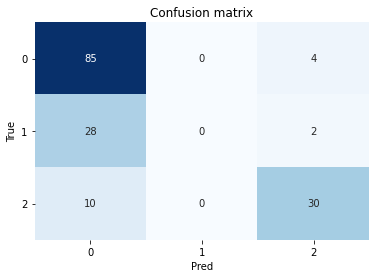

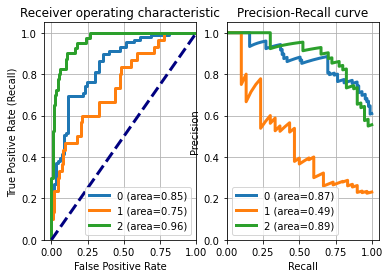

[0]
------------------------LIME---------------------------
available labels:  [0, 2]


None
note = 0 negative 1 neutral 2 positive


In [16]:
m = ml_plot_tfidf(df, MultinomialNB(), .02, limee=True)

#### Logistic Regression + TF-IDF <a class="anchor" id="tfidf_lr"></a>

train score:  0.8672863413374645
test score:  0.7547169811320755
Accuracy: 0.75
Auc: 0.85
Detail:
              precision    recall  f1-score   support

           0       0.73      0.92      0.82        89
           1       0.62      0.17      0.26        30
           2       0.85      0.82      0.84        40

    accuracy                           0.75       159
   macro avg       0.73      0.64      0.64       159
weighted avg       0.74      0.75      0.72       159



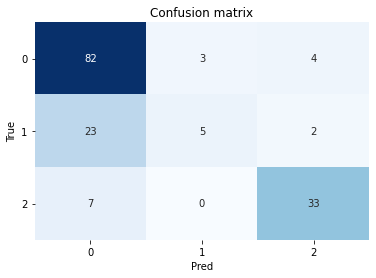

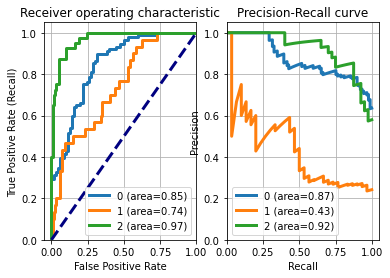

[0]
------------------------LIME---------------------------
available labels:  [0, 2]


None
note = 0 negative 1 neutral 2 positive


In [17]:
m = ml_plot_tfidf(df, LogisticRegression(max_iter=10000), .02, limee=True)